In [2]:
# Installing the packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset 
titanic_dataset = pd.read_csv("titanic.csv", index_col="PassengerId")

titanic_dataset.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


## Guiding questions.
#### Below are the questions that will be used to understand EDA 
1. Visualizing the distribution of passenger ages then identifying trends or patterns in the age distribution. Will be achieved using histograms. 

2. Comparison of survival rates between different passanger classes. Does the survival rate vary according between classes? Answered using borplots.

3. Exploring the relationship between the passenger class and survival by age. 

4. Investigating survival rate based on passenger gender.

5. Investigating survival rate based on the number of families aboard. Does having more family members affect survival rates?

### 1. Distribution of passenger ages.

Text(0, 0.5, 'Frequency')

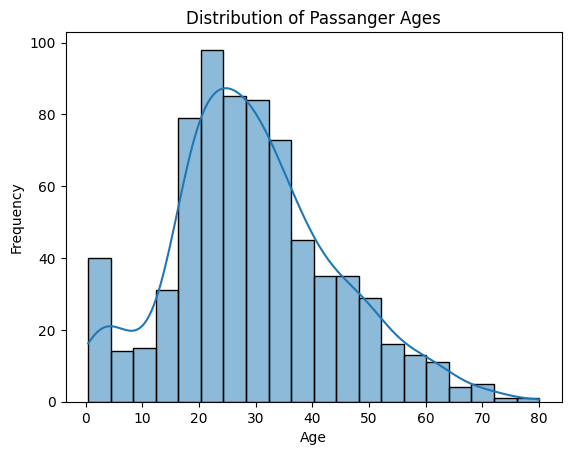

In [4]:
sns.histplot(data=titanic_dataset.Age, bins=20, kde=True)
plt.title("Distribution of Passanger Ages")
plt.ylabel("Frequency")

OBSERVATION: Most of the people are aged between 18 - 40 years.

### 2. Comparison of survival rate between different passenger classes.

In [5]:
titanic_dataset.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# How many people survived or did not survived in each class?
titanic_dataset.groupby(["Pclass", "Survived"]).Survived.agg("count")

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

- Survival rate varies according to passanger class with 1st class having the highest survival rate. This is illustrated below

Text(0.5, 0, 'Passenger Class')

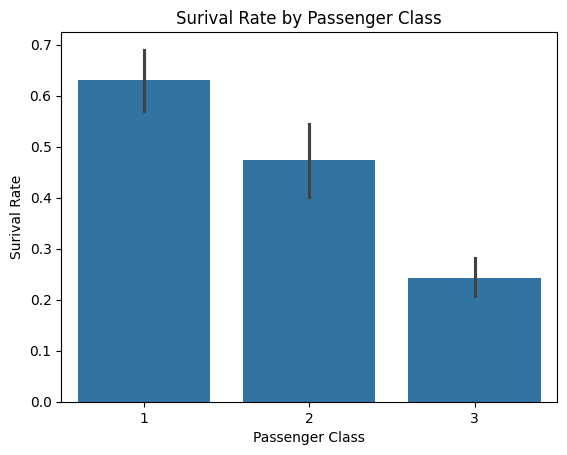

In [7]:
sns.barplot(data=titanic_dataset, x="Pclass", y="Survived")
plt.title("Surival Rate by Passenger Class")
plt.ylabel("Surival Rate")
plt.xlabel("Passenger Class")

### 3. Relationship between Passenger class and Surival by age.

Text(0, 0.5, 'Age')

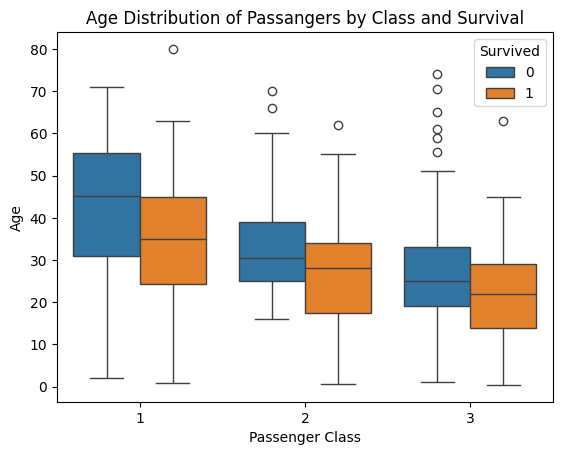

In [8]:
# Creating a boxplot to show distribution of of ages by class and survival
sns.boxplot(data=titanic_dataset, x="Pclass", y="Age", hue="Survived")

plt.title("Age Distribution of Passangers by Class and Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Age")

- The boxplot above illustrates the distribution of ages for each passenger class and the survival outocome. 
- The median age is also illustrated by (line between the boxes)
- From the plot, the median age for survivors is lower compared to that of non-survivors accross the passenger classes indicating that younger passangers had a higher chance of survival compared to older passangers. 
- Some of the reasons that could support this phenomenal could be; priority was given to children and women during evacuation resulting to a higher surival rate for younger passangers.
- Some outliers can also be sported in the dataset indicating passangers who had extreme ages.

### 4. Investigating survival rates based on passanger's gender. 

Text(0.5, 0, 'Gender')

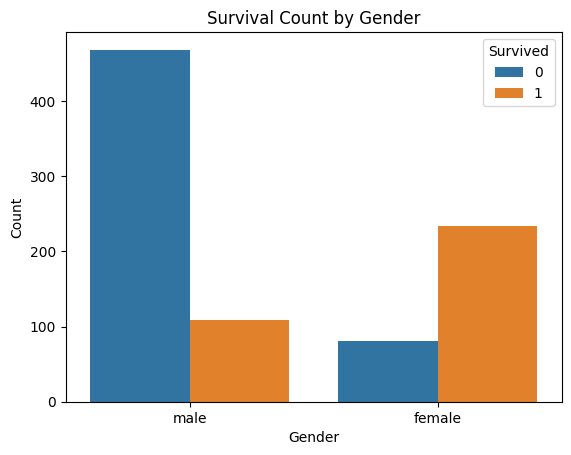

In [9]:
# Visualizing this using a countplot with "Survival" as hue 
sns.countplot(data=titanic_dataset, x="Sex", hue="Survived") 

plt.title("Survival Count by Gender")
plt.ylabel("Count")
plt.xlabel("Gender")

**OBSEVATIONS**
The above countplot illustrate illustrate survival counts by gender. From the observation, it is clear that more women that men survived. Therefore, women had a higher survival rates by men.

The higher survival survival rates can be attributed to several factors.
- Womem were given the first priority during evacuation. 
- Male passengers were largely involved in evacuating others or they put the lives of thier families first.

### 5. Examining survival rates based on the number of families aboard.
We shall create a barplot indicating the survival rate for passangers with different number of siblings/spouses (SibSp) or parent/child (Parch). 
We shall be investigating whether having more family members on the ship affects survival rate.

In [10]:
titanic_dataset.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:

def survived_map(x):
    """
    Maps "Survived Column to either "Yes" or "No" 
    0 = No 
    1 = Yes
    """
    if x == 0:
        return "No"
    else:
        return "Yes"

titanic_dataset["Survived_Map"] = titanic_dataset.Survived.apply(survived_map)
titanic_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_Map
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No


Text(0.5, 0, 'Survived')

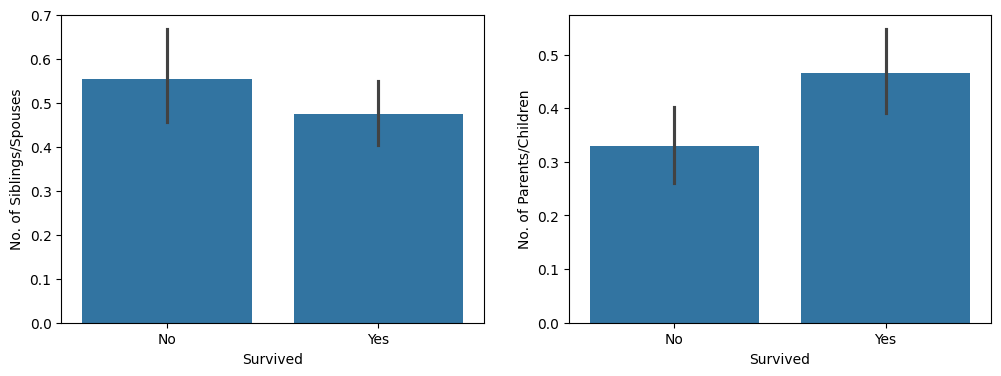

In [12]:

# Creating a barplot 
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(data=titanic_dataset, x="Survived_Map", y="SibSp", ax=axs[0])
sns.barplot(data=titanic_dataset, x="Survived_Map", y="Parch", ax=axs[1]) 

# Setting and axes labels 
axs[0].set_ylabel("No. of Siblings/Spouses")
axs[0].set_xlabel("Survived")

axs[1].set_ylabel("No. of Parents/Children")
axs[1].set_xlabel("Survived")


**OBSERVATIONS** 

- Passangers with more number of siblings had a lower survival rate while those with a higher number of parents/children had a higher survival rate. 
- We can also combine the two columns "Sibsp" and "Parch" to come up with "family_size" column

In [13]:
# Getting the size of the family 
titanic_dataset["Family_Size"] = titanic_dataset["SibSp"] + titanic_dataset["Parch"] 
titanic_dataset.tail(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_Map,Family_Size
PassengerId,,,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,No,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Yes,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,No,3
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Yes,0
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,No,0


<Axes: xlabel='Survived_Map', ylabel='Family_Size'>

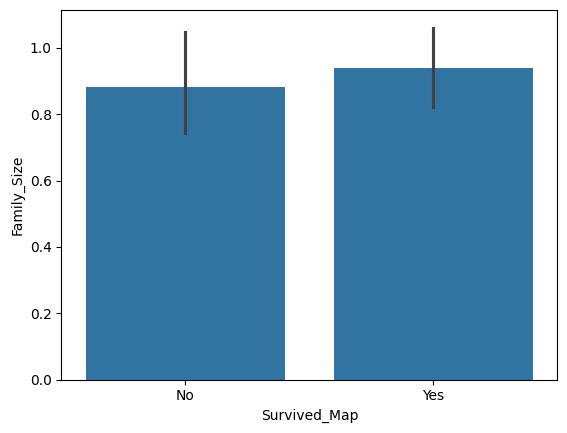

In [14]:
sns.barplot(data=titanic_dataset, x="Survived_Map", y="Family_Size")

**OBSERVATION**
- From the barplot, it can be observed that the barplot for survivors is slightly higher than for non-survivors. We can therefore say that there is a correlation between having a large family and a slightly higher chance of survival.
- Having many members of the family might have increases survival rate because there was increased cooperation amongst members of the same family during evacuation. Members of the same family might have also provided emotional support within themselves which might have also increased the rate of survival.
- The correlation is very small and other factors could have played a role too.
- nd.

### 6. Exploring the distribution of fares paid by the passangers (Using histograms or kdes). Examine if there are any outliers.

In [15]:
titanic_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_Map,Family_Size
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,0


Text(0.5, 1.0, 'Distribution of Passanger Ticket')

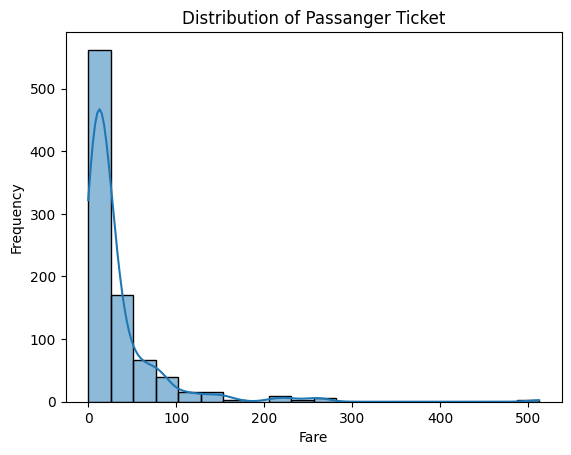

In [20]:
sns.histplot(data=titanic_dataset, x="Fare", bins=20, kde=True)
plt.ylabel("Frequency")
plt.title("Distribution of Passanger Ticket")

- The plot shows extremely high fares which is a sign of outliers. These outliers may represent fares paid by customers at 1st class or executive cabins.
- The plot however shows that most of the fares are concentrated along lower values meaning that most of the passangers bought cheap tickets.

### 7. Investigating the distribution of passanger ages (using histograms/kde) and identify any pattern.

Text(0, 0.5, 'Frequency/Density')

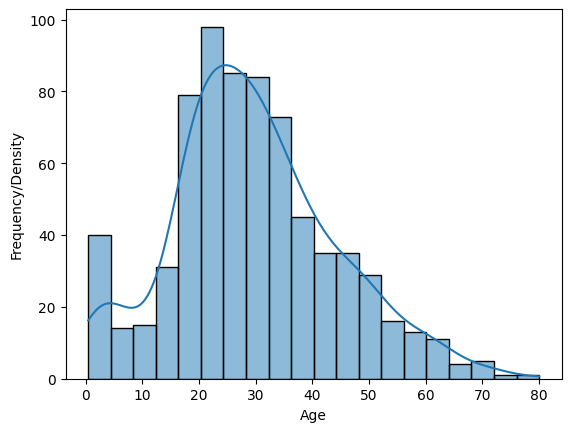

In [25]:
sns.histplot(data=titanic_dataset, x="Age", bins=20, kde=True)
plt.ylabel("Frequency/Density")

### 8. Analyzing the distribution of passangers in each class.
- This will involve visualizing the number of passangers in each class using a countplot.

Text(0, 0.5, 'No. of Passangers')

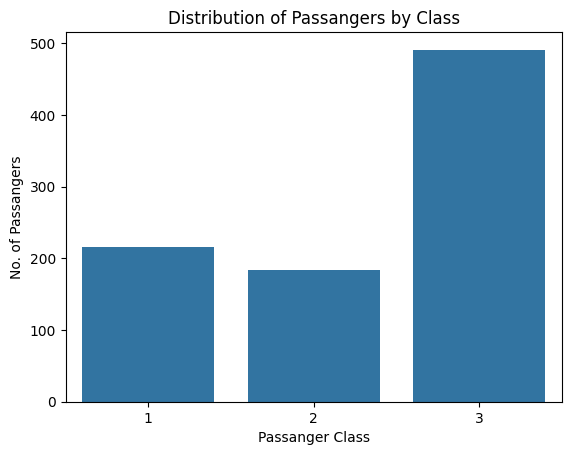

In [28]:
sns.countplot(data=titanic_dataset, x="Pclass")

plt.title("Distribution of Passangers by Class")
plt.xlabel("Passanger Class")
plt.ylabel("No. of Passangers")

**OBSERVATION**
- The countplot bar for the 3rd class is significantly taller than 1st and 2nd classes. This reveals that majority of passanger in the Ship travelled in 3rd class. This may have been contributed by the fact that ticket prices for 3rd class were affordable compared to the rest of the classes. The ship may have also been designed to accomondate more people in the third class compared to other classes.